In [1]:
import pandas as pd

# Load the review embeddings CSV file into a DataFrame
embedded_df = pd.read_csv('embedded_review_reduced.csv')

# Display the first few rows of the DataFrame to verify it was loaded correctly
embedded_df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,lengthReview,conditionCluster_label,drugNameCluster_label,...,320,321,322,323,324,325,326,327,328,329
0,95260,Guanfacine,ADHD,My son is halfway through his fourth week of I...,8.0,27-Apr-10,192.0,712.0,2.0,4.0,...,-0.072203,0.050732,-0.066741,-0.018283,-0.092436,-0.059485,-0.002017,0.068087,0.062693,0.019311
1,92703,Lybrel,Birth Control,I used to take another oral contraceptive whic...,5.0,14-Dec-09,17.0,708.0,9.0,6.0,...,0.022241,-0.060561,0.042767,0.100795,-0.017772,-0.053921,-0.089212,-0.116708,0.053316,-0.029458
2,138000,Ortho Evra,Birth Control,This is my first time using any form of birth ...,8.0,3-Nov-15,10.0,428.0,9.0,4.0,...,0.100959,-0.072072,-0.060204,-0.012960,0.144626,-0.023831,0.137507,-0.030472,-0.074193,0.128502
3,35696,Buprenorphine naloxone,Opiate Dependence,Suboxone has completely turned my life around ...,9.0,27-Nov-16,37.0,669.0,0.0,2.0,...,0.117297,0.001229,0.014790,-0.107192,-0.008831,-0.100010,-0.108753,0.033484,0.010719,0.117703
4,155963,Cialis,Benign Prostatic Hyperplasia,2nd day on 5mg started to work with rock hard ...,2.0,28-Nov-15,43.0,373.0,0.0,5.0,...,0.064630,0.036089,-0.013739,-0.062118,-0.048534,0.005309,-0.077575,0.146462,-0.013111,-0.208725


In [2]:
# Read the review_sentiment CSV
sentiment_df = pd.read_csv('reviews_sentiments.csv')

# Display the first few rows of the DataFrame to verify it was loaded correctly
sentiment_df.head()

,uniqueID,review,sentiment
0,95260,My son is halfway through his fourth week of I...,POSITIVE
1,92703,I used to take another oral contraceptive whic...,NEGATIVE
2,138000,This is my first time using any form of birth ...,NEGATIVE
3,35696,Suboxone has completely turned my life around ...,POSITIVE
4,155963,2nd day on 5mg started to work with rock hard ...,NEGATIVE


In [ ]:
!pip install wordcloud

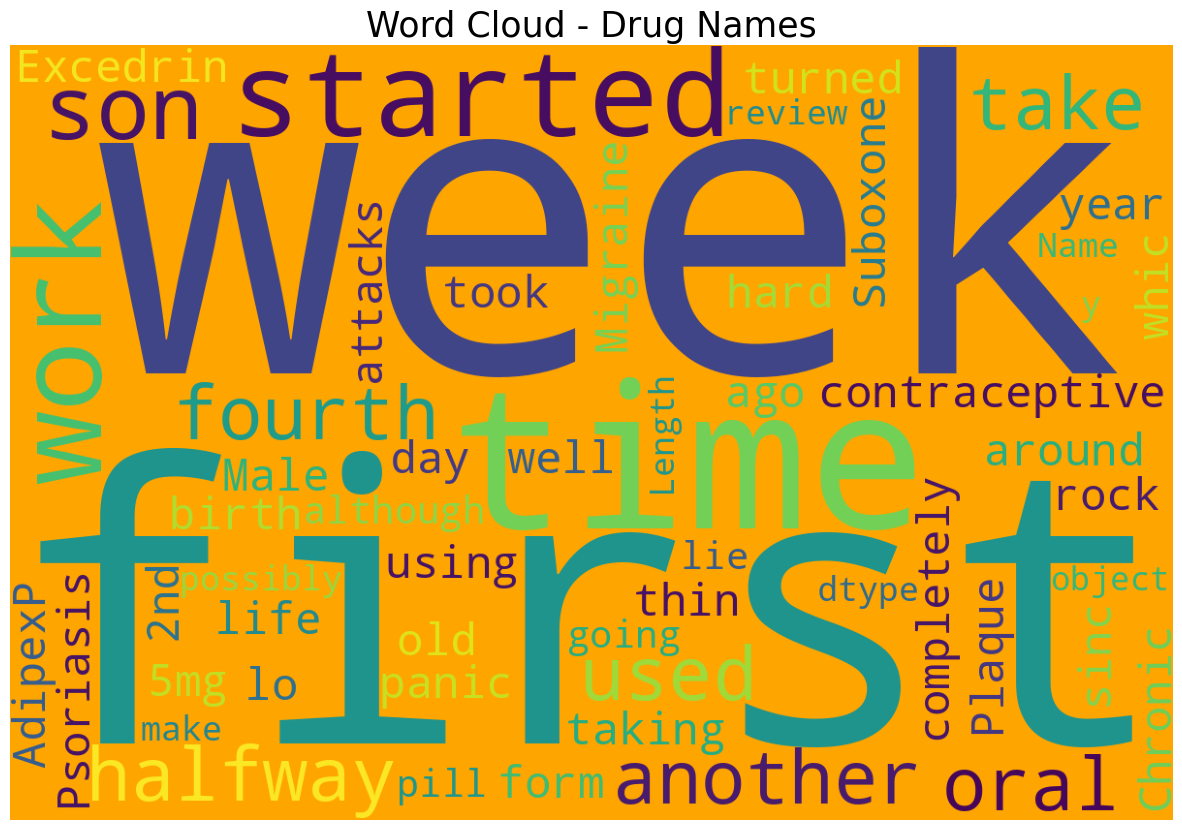

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'orange', stopwords = stopwords, width = 1200, height = 800).generate(str(sentiment_df['review']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [3]:
#update the sentiment labels

sentiment_df['sentiment'].replace('NEGATIVE', 0, inplace =True)

sentiment_df['sentiment'].replace('POSITIVE', 1, inplace =True)

sentiment_df['sentiment'].replace('NEUTRAL', 2, inplace =True)

sentiment_df.head()

,uniqueID,review,sentiment
0,95260,My son is halfway through his fourth week of I...,1
1,92703,I used to take another oral contraceptive whic...,0
2,138000,This is my first time using any form of birth ...,0
3,35696,Suboxone has completely turned my life around ...,1
4,155963,2nd day on 5mg started to work with rock hard ...,0


In [4]:
# Records for each sentiments.POstive and negative labels are almost balanced, but very few records with neutral label.
sentiment_df['sentiment'].value_counts()

1    6294
0    4953
2      68
Name: sentiment, dtype: int64

In [5]:
# drop the review column from sentiment_df
sentiment_df.drop('review', axis=1, inplace=True)

In [6]:
# drop the review column from sentiment_df
sentiment_df = sentiment_df[sentiment_df['sentiment'] != 2]

In [7]:
sentiment_df.head()

,uniqueID,sentiment
0,95260,1
1,92703,0
2,138000,0
3,35696,1
4,155963,0


In [8]:
embedded_sentiment_df = pd.merge(embedded_df, sentiment_df, on='uniqueID')

embedded_sentiment_df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,lengthReview,conditionCluster_label,drugNameCluster_label,...,321,322,323,324,325,326,327,328,329,sentiment
0,95260,Guanfacine,ADHD,My son is halfway through his fourth week of I...,8.0,27-Apr-10,192.0,712.0,2.0,4.0,...,0.050732,-0.066741,-0.018283,-0.092436,-0.059485,-0.002017,0.068087,0.062693,0.019311,1
1,92703,Lybrel,Birth Control,I used to take another oral contraceptive whic...,5.0,14-Dec-09,17.0,708.0,9.0,6.0,...,-0.060561,0.042767,0.100795,-0.017772,-0.053921,-0.089212,-0.116708,0.053316,-0.029458,0
2,138000,Ortho Evra,Birth Control,This is my first time using any form of birth ...,8.0,3-Nov-15,10.0,428.0,9.0,4.0,...,-0.072072,-0.060204,-0.012960,0.144626,-0.023831,0.137507,-0.030472,-0.074193,0.128502,0
3,35696,Buprenorphine naloxone,Opiate Dependence,Suboxone has completely turned my life around ...,9.0,27-Nov-16,37.0,669.0,0.0,2.0,...,0.001229,0.014790,-0.107192,-0.008831,-0.100010,-0.108753,0.033484,0.010719,0.117703,1
4,155963,Cialis,Benign Prostatic Hyperplasia,2nd day on 5mg started to work with rock hard ...,2.0,28-Nov-15,43.0,373.0,0.0,5.0,...,0.036089,-0.013739,-0.062118,-0.048534,0.005309,-0.077575,0.146462,-0.013111,-0.208725,0


In [9]:
# Total number of records in the dataframe
len(embedded_sentiment_df)

11247

In [10]:
# The NNet model classifies the sentiment as Postive, Negative and Neutral based on the review embeddings
# For now we are considering all the components

# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [11]:
embedded_sentiment_df.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'lengthReview', 'conditionCluster_label',
       'drugNameCluster_label',
       ...
       '321', '322', '323', '324', '325', '326', '327', '328', '329',
       'sentiment'],
      dtype='object', length=341)

In [12]:
# Drop all the columns that are not embeddings of the review and the sentiment labels.

columns_to_drop = ['uniqueID', 'drugName', 'condition', 'review', 'date', 'lengthReview', 'conditionCluster_label',
       'drugNameCluster_label']

embedded_sentiment333_df = embedded_sentiment_df.drop(columns=columns_to_drop)
embedded_sentiment333_df.head(5)

,rating,usefulCount,0,1,2,3,4,5,6,7,...,321,322,323,324,325,326,327,328,329,sentiment
0,8.0,192.0,1.887339,-0.869075,-2.625546,1.417739,0.745655,-0.639820,-0.805294,-0.375966,...,0.050732,-0.066741,-0.018283,-0.092436,-0.059485,-0.002017,0.068087,0.062693,0.019311,1
1,5.0,17.0,-0.000775,0.706566,-0.605744,-1.173229,0.284670,0.259833,0.353663,-0.332351,...,-0.060561,0.042767,0.100795,-0.017772,-0.053921,-0.089212,-0.116708,0.053316,-0.029458,0
2,8.0,10.0,0.710067,1.259798,-1.086482,-0.472165,-1.455680,-0.347598,0.391650,-0.770854,...,-0.072072,-0.060204,-0.012960,0.144626,-0.023831,0.137507,-0.030472,-0.074193,0.128502,0
3,9.0,37.0,0.987319,-0.213137,-0.683326,-1.648944,-0.148900,0.311274,0.131049,-0.585099,...,0.001229,0.014790,-0.107192,-0.008831,-0.100010,-0.108753,0.033484,0.010719,0.117703,1
4,2.0,43.0,-0.924630,0.702602,0.450114,-0.958159,-0.097065,-1.075369,-0.084259,0.394584,...,0.036089,-0.013739,-0.062118,-0.048534,0.005309,-0.077575,0.146462,-0.013111,-0.208725,0


In [54]:
# Split our preprocessed data into our features and target arrays

from keras.utils import to_categorical

# Separate the target variable
target = embedded_sentiment333_df['sentiment']

# Verify the unique values in the target variable
print(target.unique())

# Extract features (excluding the target variable)
features = embedded_sentiment333_df.drop(columns=['sentiment'])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=30, stratify=target)


# Convert target labels to one-hot encoded format
y_train_encoded = to_categorical(y_train, num_classes=2)
y_test_encoded = to_categorical(y_test, num_classes=2)

# Check the shapes of the one-hot encoded target labels
print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Shape of y_test_encoded:", y_test_encoded.shape)

[1 0]
Shape of y_train_encoded: (7872, 2)
Shape of y_test_encoded: (3375, 2)


In [55]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [42]:
# Check the number of dimensions, make it a variable so it passes into

num_dimensions = embedded_sentiment333_df.shape[1]-1
print(num_dimensions)

332


In [43]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# 3 classifications to predict now


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

nn = tf.keras.models.Sequential()

# Input layer
nn.add(tf.keras.layers.Dense(units=332, activation="sigmoid", input_dim=num_dimensions))

# Second hidden layer
nn.add(Dense(units=250, activation='relu'))

# Third hidden layer (example of adding an additional hidden layer)
nn.add(Dense(units=200, activation='leaky_relu'))

#Fourth hidden layer (example of adding another hidden layer)
nn.add(Dense(units=100, activation='relu'))

#Fifth hidden layer (example of adding another hidden layer)
# nn.add(Dense(units=100, activation='relu'))

#Sixth hidden layer (example of adding another hidden layer)
nn.add(Dense(units=50, activation='leaky_relu'))

#Seventh hidden layer (example of adding another hidden layer)
nn.add(Dense(units=25, activation='relu'))

#Eighth hidden layer (example of adding another hidden layer)
nn.add(Dense(units=15, activation='relu'))

# Output layer
nn.add(Dense(units=2, activation='softmax'))  # 3 units for 3 classes, softmax activation

# Check the structure of the model
nn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 332)               110556    
                                                                 
 dense_57 (Dense)            (None, 250)               83250     
                                                                 
 dense_58 (Dense)            (None, 200)               50200     
                                                                 
 dense_59 (Dense)            (None, 100)               20100     
                                                                 
 dense_60 (Dense)            (None, 50)                5050      
                                                                 
 dense_61 (Dense)            (None, 25)                1275      
                                                                 
 dense_62 (Dense)            (None, 15)               

In [44]:
# Compile the model - the loss function is categorical and not for binary classification

# Define optimizer with custom learning rate


nn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [53]:
y_train_encoded.shape

(7872, 2)

In [45]:
 # Fit the model to the training data
fit_model = nn.fit(X_train_scaled, y_train_encoded, epochs=10)

Epoch 1/10
246/246 [==============================] - 4s 7ms/step - loss: 0.5574 - accuracy: 0.6979
Epoch 2/10
246/246 [==============================] - 2s 7ms/step - loss: 0.4212 - accuracy: 0.8079
Epoch 3/10
246/246 [==============================] - 2s 7ms/step - loss: 0.3914 - accuracy: 0.8243
Epoch 4/10
246/246 [==============================] - 2s 7ms/step - loss: 0.3757 - accuracy: 0.8276
Epoch 5/10
246/246 [==============================] - 2s 9ms/step - loss: 0.3616 - accuracy: 0.8364
Epoch 6/10
246/246 [==============================] - 3s 11ms/step - loss: 0.3429 - accuracy: 0.8420
Epoch 7/10
246/246 [==============================] - 2s 7ms/step - loss: 0.3187 - accuracy: 0.8604
Epoch 8/10
246/246 [==============================] - 2s 7ms/step - loss: 0.2968 - accuracy: 0.8749
Epoch 9/10
246/246 [==============================] - 2s 7ms/step - loss: 0.2673 - accuracy: 0.8847
Epoch 10/10
246/246 [==============================] - 2s 7ms/step - loss: 0.2278 - accuracy: 0.906

In [46]:
test_loss, test_accuracy = nn.evaluate(X_test_scaled, y_test_encoded)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

106/106 [==============================] - 0s 3ms/step - loss: 0.6229 - accuracy: 0.8062
Test Loss: 0.6229486465454102
Test Accuracy: 0.8062222003936768


In [56]:


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Define the model - deep neural net with L2 regularization
nn = Sequential()

# First hidden layer with L2 regularization
nn.add(Dense(units=332, activation="relu", kernel_regularizer=regularizers.l2(0.001), input_dim=num_dimensions))

# Second hidden layer with L2 regularization
nn.add(Dense(units=250, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Third hidden layer with L2 regularization
nn.add(Dense(units=200, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Fourth hidden layer with L2 regularization
nn.add(Dense(units=100, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Fifth hidden layer with L2 regularization
nn.add(Dense(units=50, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Sixth hidden layer with L2 regularization
nn.add(Dense(units=25, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Seventh hidden layer with L2 regularization
# nn.add(Dense(units=64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Eighth hidden layer with L2 regularization
nn.add(Dense(units=15, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Output layer
nn.add(Dense(units=2, activation='softmax'))

# Define optimizer with custom learning rate
custom_optimizer = Adam(learning_rate=0.001)

# Compile the model with the custom optimizer
nn.compile(loss="categorical_crossentropy", optimizer=custom_optimizer, metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn.fit(X_train_scaled, y_train_encoded, epochs=200)

Epoch 1/200
246/246 [==============================] - 6s 15ms/step - loss: 1.2566 - accuracy: 0.7463
Epoch 2/200
246/246 [==============================] - 3s 10ms/step - loss: 0.7702 - accuracy: 0.8496
Epoch 3/200
246/246 [==============================] - 2s 7ms/step - loss: 0.5765 - accuracy: 0.8834
Epoch 4/200
246/246 [==============================] - 2s 7ms/step - loss: 0.4668 - accuracy: 0.9093
Epoch 5/200
246/246 [==============================] - 2s 7ms/step - loss: 0.3938 - accuracy: 0.9327
Epoch 6/200
246/246 [==============================] - 2s 7ms/step - loss: 0.3430 - accuracy: 0.9488
Epoch 7/200
246/246 [==============================] - 2s 7ms/step - loss: 0.2976 - accuracy: 0.9660
Epoch 8/200
246/246 [==============================] - 3s 13ms/step - loss: 0.2852 - accuracy: 0.9680
Epoch 9/200
246/246 [==============================] - 2s 8ms/step - loss: 0.2646 - accuracy: 0.9736
Epoch 10/200
246/246 [==============================] - 2s 8ms/step - loss: 0.2417 - acc

In [ ]:
test_loss, test_accuracy = nn.evaluate(X_test_scaled, y_test_encoded)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

106/106 [==============================] - 0s 3ms/step - loss: 1.2546 - accuracy: 0.7701
Test Loss: 1.2546024322509766
Test Accuracy: 0.7700740694999695


In [ ]:
X_train_scaled.shape

(7872, 332)

In [ ]:
y_train_encoded.shape

(7872, 2)

In [47]:
import numpy as np
#Get the test results from the above Neural Net

# Get predicted probabilities for each class
y_pred_probabilities = nn.predict(X_test_scaled)

# Convert probabilities to predicted classes by selecting the class with the highest probability
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Convert one-hot encoded y_test_encoded back to categorical labels
y_test_categorical = np.argmax(y_test_encoded, axis=1)

# Create a DataFrame to compare predicted and actual classes
result_df = pd.DataFrame({'Actual': y_test_categorical, 'Predicted': y_pred})

# Add a column indicating whether the prediction was correct
result_df['Correct'] = result_df['Actual'] == result_df['Predicted']

# Display the DataFrame
print(result_df)

# Calculate accuracy manually
accuracy = result_df['Correct'].mean()
print("Manual Test Accuracy:", accuracy)

106/106 [==============================] - 0s 2ms/step
      Actual  Predicted  Correct
0          1          1     True
1          0          1    False
2          1          1     True
3          0          1    False
4          1          1     True
...      ...        ...      ...
3370       1          1     True
3371       1          1     True
3372       1          1     True
3373       1          1     True
3374       1          1     True

[3375 rows x 3 columns]
Manual Test Accuracy: 0.8062222222222222


In [48]:
from google.colab import files
# Export result_df to a CSV file
result_df.to_csv('prediction_results.csv', index=False)
# Download the CSV file
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.3 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

# Define the model-building function
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units_input', min_value=64, max_value=800, step=64), activation='relu', input_dim=num_dimensions))
    for i in range(hp.Int('num_layers', 1, 8)):  # Number of hidden layers
        model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=64, max_value=512, step=64), activation='relu'))
    model.add(layers.Dense(2, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

# Instantiate the tuner and perform hyperparameter search
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=3,
    directory='my_dir',
    project_name='helloworld')

tuner.search(X_train_scaled, y_train_encoded, epochs=5, validation_split=0.2)

# Get the best hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Optimal number of units in the input layer: {best_hps.get('units_input')}")
print(f"Optimal learning rate for the optimizer: {best_hps.get('learning_rate')}")
print(f"Optimal number of hidden layers: {best_hps.get('num_layers')}")
for i in range(best_hps.get('num_layers')):
    print(f"Optimal number of units in layer {i}: {best_hps.get('units_' + str(i))}")

# Build the model with the best hyperparameters and train it on the data
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_scaled, y_train_encoded, epochs=50, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test_encoded)
print("Test accuracy:", accuracy)

Trial 20 Complete [00h 00m 58s]
val_accuracy: 0.7928042411804199

Best val_accuracy So Far: 0.800000011920929
Total elapsed time: 01h 23m 26s
Optimal number of units in the input layer: 512
Optimal learning rate for the optimizer: 0.001
Optimal number of hidden layers: 8
Optimal number of units in layer 0: 448
Optimal number of units in layer 1: 256
Optimal number of units in layer 2: 64
Optimal number of units in layer 3: 256
Optimal number of units in layer 4: 192
Optimal number of units in layer 5: 320
Optimal number of units in layer 6: 448
Optimal number of units in layer 7: 64
Epoch 1/50
197/197 [==============================] - 5s 19ms/step - loss: 0.5475 - accuracy: 0.7053 - val_loss: 0.4804 - val_accuracy: 0.7575
Epoch 2/50
197/197 [==============================] - 4s 20ms/step - loss: 0.3685 - accuracy: 0.8382 - val_loss: 0.4396 - val_accuracy: 0.8006
Epoch 3/50
197/197 [==============================] - 3s 16ms/step - loss: 0.2645 - accuracy: 0.8944 - val_loss: 0.4974 - va

In [49]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming 'embedded_sentiment333_df' is your DataFrame

# Separate the target variable
target = embedded_sentiment333_df['sentiment']

# Extract features (excluding the target variable)
features = embedded_sentiment333_df.drop(columns=['sentiment'])

# Convert target labels to one-hot encoded format
target_encoded = to_categorical(target, num_classes=2)

# Create a StandardScaler instance
scaler = StandardScaler()

# Create a StratifiedKFold instance
num_folds = 10
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store training and testing results
train_accuracies = []
test_accuracies = []

# Iterate over the folds
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(features, target)):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target_encoded[train_index], target_encoded[test_index]

    # Scale the data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define the model
    nn = Sequential()
    nn.add(Dense(units=332, activation="sigmoid", input_dim=features.shape[1]))
    nn.add(Dense(units=250, activation='relu'))
    nn.add(Dense(units=200, activation='relu'))
    nn.add(Dense(units=100, activation='relu'))
    nn.add(Dense(units=50, activation='relu'))
    nn.add(Dense(units=25, activation='relu'))
    nn.add(Dense(units=15, activation='relu'))
    nn.add(Dense(units=2, activation='softmax'))

    # Compile the model
    nn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    # Fit the model to the training data
    nn.fit(X_train_scaled, y_train, epochs=10, verbose=0)

    # Evaluate on training data
    train_loss, train_accuracy = nn.evaluate(X_train_scaled, y_train, verbose=0)
    train_accuracies.append(train_accuracy)

    # Evaluate on testing data
    test_loss, test_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=0)
    test_accuracies.append(test_accuracy)

    print(f"Fold {fold + 1}: Train Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}")

# Display average and standard deviation of accuracies
print(f"\nAverage Train Accuracy: {np.mean(train_accuracies):.4f} ± {np.std(train_accuracies):.4f}")
print(f"Average Test Accuracy: {np.mean(test_accuracies):.4f} ± {np.std(test_accuracies):.4f}")


Fold 1: Train Accuracy = 0.9413, Test Accuracy = 0.8036
Fold 2: Train Accuracy = 0.9009, Test Accuracy = 0.8036
Fold 3: Train Accuracy = 0.9223, Test Accuracy = 0.7929
Fold 4: Train Accuracy = 0.9006, Test Accuracy = 0.8098
Fold 5: Train Accuracy = 0.9030, Test Accuracy = 0.8036
Fold 6: Train Accuracy = 0.9069, Test Accuracy = 0.7947
Fold 7: Train Accuracy = 0.9137, Test Accuracy = 0.7956
Fold 8: Train Accuracy = 0.9146, Test Accuracy = 0.8025
Fold 9: Train Accuracy = 0.9112, Test Accuracy = 0.7980
Fold 10: Train Accuracy = 0.9195, Test Accuracy = 0.8060

Average Train Accuracy: 0.9134 ± 0.0117
Average Test Accuracy: 0.8010 ± 0.0052
